# Image Based Point Cloud Segmentation

Kefeng Huang timkhuang@icloud.com

## Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pykitti
from kitti_labels import kitti_colors, cityscapes2kitti

from predict import predit_on_label
from utils import get_poses, get_labels
from evaluate import evaluate_sequence

## Dataset

This project is using the *Kitti Odometry* dataset for point cloud, images and 
calibration data and *SemanticKitti* for corresponding labels.

* *Kitti Odometry*: http://www.cvlibs.net/datasets/kitti/eval_odometry.php
* *SemanticKitti*: http://www.semantic-kitti.org/

In [2]:
kitti_dataset_path = r'../kitti-dataset'
seq = '06'
kitti_dataset = pykitti.odometry(kitti_dataset_path, sequence=seq)

In [3]:
# translate cityscapes label to kitti labels
translate = np.vectorize(lambda l: cityscapes2kitti[l])

## Segmentation based on Image Predicted Labels

The first part is directly using the labels predicted with 
*NVIDIA/Semantic-Segmentation* method using pre-trained *DeepWV3Plus* network
model *kitti_best.pth*. 

This part also tests different number of images to use and evaluates the 
different using the code adapted from *semanticKitti-api*. 

In [4]:
image_label_path = f"../prerun-cam2feature/label/{seq}"

image_label = [
    translate(np.load(os.path.join(image_label_path, l)))
    for l in sorted(os.listdir(image_label_path))
]

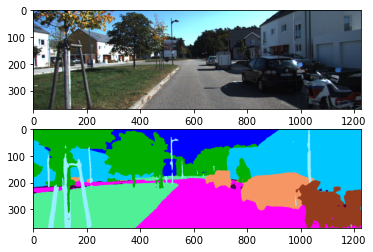

In [5]:
sample_index = np.random.randint(len(kitti_dataset))

img = kitti_dataset.get_cam2(sample_index)
label = image_label[sample_index]
colored_pred = np.array([
    [kitti_colors[i] for i in row] for row in label
])

fig, axs = plt.subplots(2)
axs[0].imshow(img)
axs[1].imshow(colored_pred)

In [6]:
velo_label_path = f'../kitti-dataset/sequences/{seq}/labels'

labels = []
for l in sorted(os.listdir(velo_label_path)):
    label = np.fromfile(os.path.join(velo_label_path, l), dtype=np.int32)
    labels.append(label)

print(len(labels))

1101


In [7]:
num_prev = 3

predictions = []

for idx, point in enumerate(kitti_dataset.velo):
    predictions.append(predit_on_label(
        point,
        image_label[idx],
        kitti_dataset.poses[idx],
        get_labels(image_label, max(0, idx - num_prev), idx),
        get_poses(kitti_dataset, max(0, idx - num_prev), idx),
        kitti_dataset.calib
    ))

    if idx % 100 == 0:
        print(f'{idx} images predictions has completed')

mean_ap = evaluate_sequence(predictions, labels)
print(f'Mean Average Precision: {mean_ap:2f}')

0 images predictions has completed
100 images predictions has completed
200 images predictions has completed
300 images predictions has completed
400 images predictions has completed
500 images predictions has completed
600 images predictions has completed
700 images predictions has completed
800 images predictions has completed
900 images predictions has completed
1000 images predictions has completed
1100 images predictions has completed
Mean Average Precision: 0.740447


In [8]:
num_prev = 5

predictions = []

for idx, point in enumerate(kitti_dataset.velo):
    predictions.append(predit_on_label(
        point,
        image_label[idx],
        kitti_dataset.poses[idx],
        get_labels(image_label, max(0, idx - num_prev), idx),
        get_poses(kitti_dataset, max(0, idx - num_prev), idx),
        kitti_dataset.calib
    ))

    if idx % 100 == 0:
        print(f'{idx} images predictions has completed')

mean_ap = evaluate_sequence(predictions, labels)
print(f'Mean Average Precision: {mean_ap:2f}')

0 images predictions has completed
100 images predictions has completed
200 images predictions has completed
300 images predictions has completed
400 images predictions has completed
500 images predictions has completed
600 images predictions has completed
700 images predictions has completed
800 images predictions has completed
900 images predictions has completed
1000 images predictions has completed
1100 images predictions has completed
Mean Average Precision: 0.731010


In [9]:
num_prev = 7

predictions = []

for idx, point in enumerate(kitti_dataset.velo):
    predictions.append(predit_on_label(
        point,
        image_label[idx],
        kitti_dataset.poses[idx],
        get_labels(image_label, max(0, idx - num_prev), idx),
        get_poses(kitti_dataset, max(0, idx - num_prev), idx),
        kitti_dataset.calib
    ))

    if idx % 100 == 0:
        print(f'{idx} images predictions has completed')

mean_ap = evaluate_sequence(predictions, labels)
print(f'Mean Average Precision: {mean_ap:2f}')

0 images predictions has completed
100 images predictions has completed
200 images predictions has completed
300 images predictions has completed
400 images predictions has completed
500 images predictions has completed
600 images predictions has completed
700 images predictions has completed
800 images predictions has completed
900 images predictions has completed
1000 images predictions has completed
1100 images predictions has completed
Mean Average Precision: 0.722302


In [10]:
num_prev = 9

predictions = []

for idx, point in enumerate(kitti_dataset.velo):
    predictions.append(predit_on_label(
        point,
        image_label[idx],
        kitti_dataset.poses[idx],
        get_labels(image_label, max(0, idx - num_prev), idx),
        get_poses(kitti_dataset, max(0, idx - num_prev), idx),
        kitti_dataset.calib
    ))

    if idx % 100 == 0:
        print(f'{idx} images predictions has completed')

mean_ap = evaluate_sequence(predictions, labels)
print(f'Mean Average Precision: {mean_ap:2f}')

0 images predictions has completed
100 images predictions has completed
200 images predictions has completed
300 images predictions has completed
400 images predictions has completed
500 images predictions has completed
600 images predictions has completed
700 images predictions has completed
800 images predictions has completed
900 images predictions has completed
1000 images predictions has completed
1100 images predictions has completed
Mean Average Precision: 0.716746


## Segmentation based on Image Features

1. not fixed number of previous images
   1. plan to use 0 for place holder
2. point or image
3. which part to delete?
4. 
